<a href="https://colab.research.google.com/github/SantiDrelewicz/Data-Science/blob/main/Introduccion%20al%20modelado%20continuo/Laboratorio%20Num%C3%A9rico/Colabs/nb01_Raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> (√öltima Actualizaci√≥n: 16 de Agosto de 2025)

# **Introducci√≥n al modelado continuo** (*a.k.a.* **Ecuaciones de la f√≠sica matem√°tica**)
## Laboratorio num√©rico

Bienvenidos al laboratorio num√©rico de la materia *Introducci√≥n al modelado continuo*, tambi√©n conocida como *Ecuaciones de la f√≠sica matem√°tica*. En este, vamos a ver m√©todos num√©ricos para resolver distintos tipos de problemas de manera general, y su relaci√≥n y aplicaci√≥n a problemas espec√≠ficos de la materia, de manera tal de complementar los contenidos de la cursada te√≥rico-pr√°ctica.


# Motivaci√≥n de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas din√°micos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)** que describen la evoluci√≥n temporal de variables continuas.

En este marco, es importante recordar:
* Nos concentraremos principalmente en **sistemas aut√≥nomos**, por lo que las variables no dependen expl√≠citamente del tiempo y su evoluci√≥n se define a partir de la ecuaci√≥n $\dot{x}=dx/dt=f(x)$
* $f(x)$ es lo que llamamos un **campo vector**
* Definimos como **punto fijo ($x^{*}$)** aquel para el cual se cumple que $\dot{x}=f(x)=0$
* De esta manera, si la condici√≥n inicial es $x(0)=x^{*}$, la √∫nica evoluci√≥n temporal posible ser√≠a permanecer en ese punto fijo $\forall t > 0$
* Los **puntos fijos** separan regiones en los que el **campo vector** tiene distinto signo
* El signo del campo vector define la **direcci√≥n del flujo**:
    * Si $f(x) > 0$, entonces $\dot{x} > 0$, por lo que $x$ crece.
    * Si $f(x) < 0$, entonces $\dot{x} < 0$, por lo que $x$ decrece.

Entonces, los puntos fijos $x^{*}$, son las ra√≠ces del campo vector (donde el campo vector se hace cero) de la forma $\dot{x}=f(x)=0$. Esto motiva a que estudiemos distintos **m√©todos num√©ricos para el c√°lculo de ra√≠ces** de funciones. Pero antes, vamos a hacer una breve introducci√≥n acerca de c√≥mo podemos empezar a abordar los temas de la materia usando Python y librer√≠as de Pyhton, como repaso.

*Observaci√≥n: Se trata de un **repaso** de c√≥mo cargar paquetes, manejar variables, graficar, definir funciones, el uso de condicionales y loops, y otras cosas b√°sicas de Python, en el marco de temas de la materia. Si este repaso les resulta trivial porque acostumbran manejar este lenguaje de programaci√≥n, **hacemos una mirada superficial de esta secci√≥n y pasamos a la siguiente**.*


## Campo vector y puntos fijos

Supongamos que tenemos el sistema din√°mico

$\dot{x}=f(x)=2x-4$

In [ ]:
# # # Cargamos paquetes est√°ndar para empezar a trabajar
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp

In [ ]:
# # # Definimos la funci√≥n campovectorlineal para el sistema din√°mico
def campovectorlineal(x):
    return 2*x - 4

In [ ]:
# # # Definimos un dominio en el cual inspeccionamos el campo vector
# # # Ac√° pueden probar distintos rangos de valores discretos
x = np.arange(-6, 6, 0.05)
y = campovectorlineal(x)

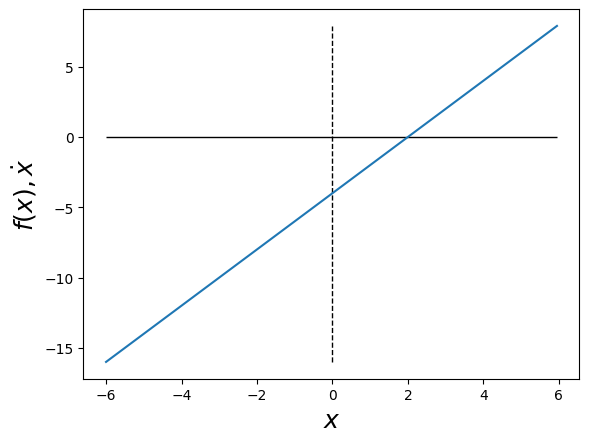

In [ ]:
# # # Graficamos el campo vecto en ese dominio
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)
plt.show()

Para el caso de un campo vector descrito por una funci√≥n lineal, sabemos que el comportamiento ser√° mon√≥tono (creciente o decreciente dependiendo de la pendiente), y tendr√° una √∫nica ra√≠z. La ra√≠z del campo vector ser√° el punto fijo del sistema. Debido al comportamiento mon√≥tono, la funci√≥n evaluada en todos los valores menores al punto fijo tendr√° un signo, y en todos los valores mayores al punto fijo tendr√° otro signo. El ordenamiento de las regiones de cada signo va a depender de la pendiente de la funci√≥n lineal.

Podr√≠amos estimar a mano la posici√≥n de la ra√≠z teniendo en cuenta el cambio de signo de la funci√≥n

In [ ]:
if y[0] < 0:
    xfijo = (x[y < 0][-1] + x[y > 0][0])/2
elif y[0] > 0:
    xfijo = (x[y > 0][-1] + x[y < 0][0])/2

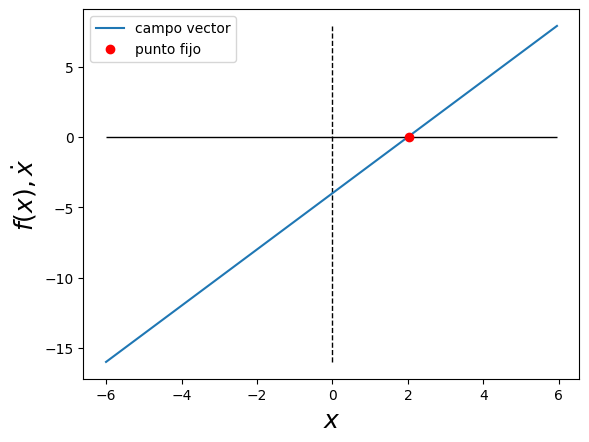

In [ ]:
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y, '-', label='campo vector')
plt.plot(xfijo, 0, marker='o', ls='', c='r', label='punto fijo')
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)
plt.legend()
plt.show()

## Estabilidad de puntos fijos


Supongamos que tenemos el sistema din√°mico

$\dot{x}=f(x)=x-x^{3}$

In [ ]:
# # # Definimos la funci√≥n campovector para el sistema din√°mico
def campovector(x):
    return x - x**3

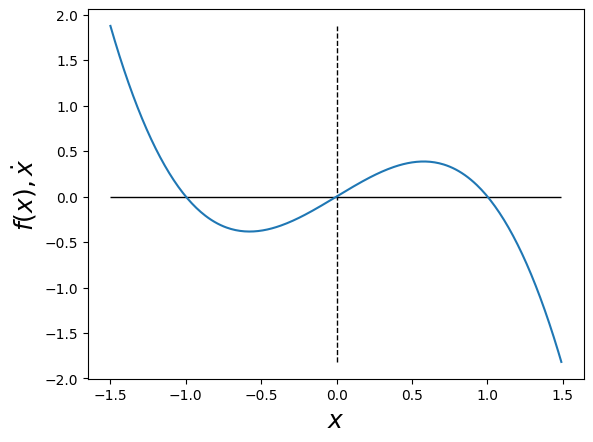

In [ ]:
# # # Definimos el dominio, evaluamos el campo vector, y graficamos
# # # Podemos probar con distintos dominios para ver el comportamiento general del campo vector
x = np.arange(-1.5, 1.5, 0.01)
y = campovector(x)
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)
plt.show()

Vamos a considerar este ejemplo como introductorio e ilustrativo del uso de Python a temas de la materia, por lo que vamos a obtener los puntos fijos de manera anal√≠tica.

Reescribir el campo vector de la siguiente manera, de donde se deduce que los puntos fijos son 0, 1, y -1:

$\dot{x}=f(x)=x(1-x^{2})=x(x-1)(x+1)$

Para estudiar la estabilidad de estos puntos fijos podemos evaluar la funci√≥n que describe el campo vector antes y despu√©s del punto fijo en un entorno, y de acuerdo al signo que nos describe el flujo podemos determinar su estabilidad.

Otra forma, m√°s sistem√°tica, ser√≠a derivando el campo vector y estudiando su signo cuando se eval√∫a en el punto fijo. Notar que esta descripci√≥n en definitiva me describe lo mismo, el flujo en un entorno del punto fijo.

Podemos obtener anal√≠ticamente la derivada del campo vector, lo cual dar√≠a la expresi√≥n:

$f'(x)=1-3x^{2}$


In [ ]:
# # # Hacemos una lista con los puntos fijos obtenidos a mano
puntosfijos = [-1, 0, 1]
# # # Definimos la funci√≥n que describe la derivada del campo vector
def campovectorprima(x):
    return 1 - 3 * x**2

In [ ]:
# # # Definimos nuevas variables que nos dar√°n informaci√≥n de la pendiente en un entorno del punto fijo,
# # # y del signo de la derivada del campo vector evaluada en el punto fijo.
# # # En este caso, elegimos por convenci√≥n que la variable estabilidad sea 1 (0) cuando la derivada es menor (mayor) a cero
pendientes = []
estabilidad = []
for p in puntosfijos:
    pendientes.append(campovectorprima(p))
    estabilidad.append(int(campovectorprima(p) < 0))

ordenadas = -np.array(pendientes) * np.array(puntosfijos)

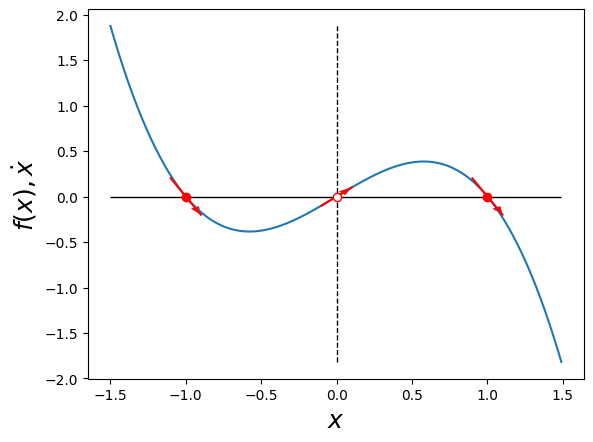

In [ ]:
markerfcolors, markerecolors = ('w', 'r'), ('r', 'r')
epsilon = 0.1
n = 10

plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)

for i in np.arange(len(puntosfijos)):
    x_tmp = np.linspace(puntosfijos[i] - epsilon, puntosfijos[i] + epsilon, n)
    y_tmp = pendientes[i]*x_tmp + ordenadas[i]
    plt.plot(x_tmp, y_tmp, 'r')
    plt.arrow(
        x_tmp[-2], y_tmp[-2], x_tmp[-1]-x_tmp[-2], y_tmp[-1]-y_tmp[-2],
        shape='full', color='r', lw=0, length_includes_head=True, head_width=.06
    )
    plt.plot(puntosfijos[i], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[i]],
             markeredgecolor=markerecolors[estabilidad[i]])
plt.show()

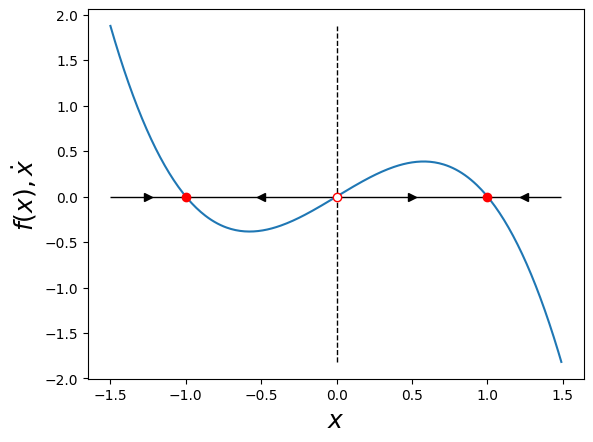

In [ ]:
markerfcolors, markerecolors, xmarkerstyle = ('w', 'r'), ('r', 'r'), ('<', '>')

plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)

puntosfijos_sorted = np.sort(puntosfijos)
for i in range(len(puntosfijos_sorted)):

    if puntosfijos_sorted[i] == puntosfijos_sorted.min():
        x_markers_tmp = [x[0] + (puntosfijos_sorted[i] - x[0])/2]
    elif puntosfijos_sorted[i] == puntosfijos_sorted.max():
        x_markers_tmp = [x[-1] - (x[-1] - puntosfijos_sorted[i])/2]
    else:
        x_markers_tmp = [
            puntosfijos_sorted[i] - (puntosfijos_sorted[i] - puntosfijos_sorted[i-1])/2,
            puntosfijos_sorted[i] + (puntosfijos_sorted[i+1] - puntosfijos_sorted[i])/2
        ]

    plt.plot(puntosfijos_sorted[i], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[i]],
             markeredgecolor=markerecolors[estabilidad[i]])

    for j in np.arange(len(x_markers_tmp)):
        plt.plot(
            x_markers_tmp[j], 0, c='k',
            marker=xmarkerstyle[int(campovector(x_markers_tmp[j]) > 0)]
        )

plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$f(x), \dot{x}$', fontsize=18)
plt.show()

# C√°lculo de ra√≠ces de una funci√≥n

Para hallar los **puntos fijos**, resulta necesario encontrar los **ceros del campo vector**. Por lo tanto, en esta secci√≥n vamos a explorar algunos m√©todos num√©ricos para el **c√°lculo de ra√≠ces** de funciones.

## M√©todo de bisecci√≥n

El algoritmo m√°s simple para encontrar ra√≠ces es el [m√©todo de bisecci√≥n](https://en.wikipedia.org/wiki/Bisection_method). El algoritmo se aplica a cualquier funci√≥n continua $f(x)$ en un intervalo $[a,b]$ donde el valor de la funci√≥n $f(x)$ cambia de signo de $a$ a $b$. La idea es simple: dividir el intervalo en dos, debe existir una soluci√≥n dentro de un subintervalo, seleccionar el subintervalo donde cambia el signo de $f(x)$ y repetir.

El procedimiento del m√©todo de bisecci√≥n es el siguiente:
1. Elija un intervalo inicial $[a_0,b_0]$ tal que $f(a_0)f(b_0) < 0$
2. Calcule $f(c_0)$ donde $c_0 = (a_0+b_0)/2$ es el punto medio
3. Determine el siguiente subintervalo $[a_1,b_1]$:
  1. Si $f(a_0)f(c_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=a_0$ y $b_1=c_0$
  2. Si $f(b_0)f(c_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=c_0$ y $b_1=b_0$
4. Repita (2) y (3) hasta un criterio de corte que puede ser: que el n√∫mero de iteraciones N llegue a un n√∫mero de iteraciones m√°ximo predefinido $N_max$; que el intervalo $[a_N,b_N]$ alcance una longitud menor a una tolerancia $œµ$ predeterminada $|b_N-a_N|<œµ$; alg√∫n otro criterio
5. Devuelva el valor del punto medio $c_N=(a_N+b_N)/2$.

![raices_biseccion](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_biseccion.png)

El <a href="https://en.wikipedia.org/wiki/Intermediate_value_theorem">Teorema del valor intermedio</a> garantiza una soluci√≥n de la ecuaci√≥n $f(x)=0$ en el intervalo $[a,b]$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b) < 0$. Es decir, la funci√≥n cambia de signo en el intervalo y, por lo tanto, debe ser igual a 0 en alg√∫n punto del intervalo $[a,b]$.


### Ejercicio 1

Escriba una funci√≥n llamada `biseccion` que tome 4 par√°metros de entrada `f`, `a`, `b` y `N` y devuelva la aproximaci√≥n de una soluci√≥n de $f(x)=0$ dada por $N$ iteraciones del m√©todo de bisecci√≥n.

[Opcional extra] Si $f(a_n)f(b_n) > 0$ en cualquier punto de la iteraci√≥n (causado ya sea por un intervalo inicial incorrecto o un error de redondeo en los c√°lculos), entonces imprima `"El m√©todo de bisecci√≥n falla"` y devuelva `None`.

In [ ]:
def biseccion(f, a, b, N=1):
  an, bn = a, b
  for n in range(N):
      if f(an)*f(bn) > 0:
          print("El m√©todo de bisecci√≥n falla")
          return None
      cn = (an + bn)/2
      if f(an)*f(cn) < 0:
          bn = cn
      elif f(cn)*f(bn) < 0:
          an = cn
  return cn

In [ ]:
f = lambda x: x
biseccion(f, -1, 5, 10)

0.001953125

### Ejercicio 2

Ahora vamos a evaluar el c√≥digo de nuestro m√©todo de bisecci√≥n en la funci√≥n `campovector` que definimos previamente ($f(x)=x-x^{3}$).

Para pensar y probar:


1. C√≥mo definir√≠a las condiciones iniciales para encontrar cada punto fijo?

En bisecci√≥n se elige un intervalo [a,b] continuo con cambio de signo:
f(a)‚Äâf(b)< 0 y que contenga solo esa ra√≠z. Ejemplos seguros:

In [ ]:
c_iniciales = [(-1.5, -0.5), (-0.5, 0.5), (0.5, 1.5)]


2. Bajo que relaci√≥n de las condiciones iniciales se puede encontrar la soluci√≥n exacta con muy pocas iteraciones? [Hint: piense en c√≥mo estimo mi soluci√≥n probable en cada paso de la iteraci√≥n]

- Que el intervalo $[a_0, b_0]$ sea sim√©trico respecto de la raiz de forma que en esta sea el punto medio. De esta forma al calcular $c_0 = a_0 + b_0$ ‚üπ detecta en la 1¬™ iteraci√≥n.
- Que alguno $a_0$ o $b_0$ sea 0 ‚üπ termina en la 1¬∞ iteraci√≥n


3. Elija una ra√≠z conocida, brinde las condiciones iniciales adecuadas para encontrarla, y muestre como se va aproximando la estimaci√≥n a medida que aumento el n√∫mero de iteraciones. Haga el gr√°fico de soluci√≥n en funci√≥n del N.

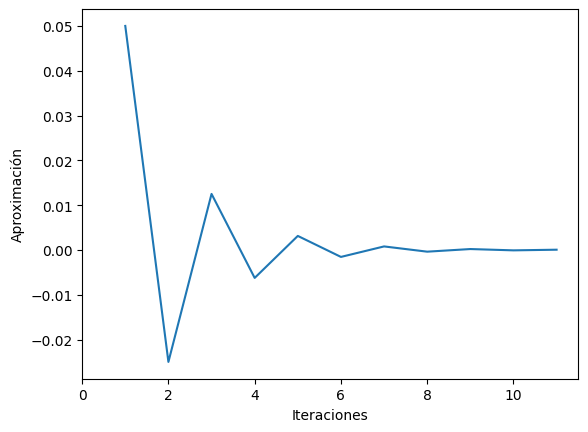

In [ ]:
a0, b0 = -0.1, 0.2
N = 12
aproxs = [biseccion(campovector, a0, b0, n) for n in range(1, N)]

plt.plot(np.arange(1, N), aproxs)
plt.xlabel('Iteraciones')
plt.ylabel('Aproximaci√≥n')
plt.xticks(np.arange(0, N, 2))
plt.show()

4. Qu√© sucede cuando pongo como condiciones iniciales [-1.5, 0.5]? Qu√© es lo que est√° pasando?



In [ ]:
biseccion(campovector, -1.5, 0.5, 10)

El m√©todo de bisecci√≥n falla


$f(‚àí1.5)=1.875 > 0$ y $f(0.5) = 0.375 > 0$ ‚áí no hay cambio de signo.
Bisecci√≥n no arranca (no se cumple $f(a)f(b) < 0$).

5. Qu√© sucede cuando pongo como condiciones iniciales [-1.7, 1.5]? Qu√© es lo que est√° pasando?

In [ ]:
biseccion(campovector, -1.7, 1.5, 10)

-1.0031249999999998

Hay cambio de signo ($f(‚àí1.7)>0,¬†f(1.5)<0$), pero el intervalo contiene tres ra√≠ces (‚àí1,0,1). Bisecci√≥n garantiza converger a alguna ra√≠z, pero no cu√°l. En este caso, el primer punto medio es ‚àí0.1 (negativo), por lo que el algoritmo sigue en [‚àí1.7, ‚àí0.1] y terminar√° convergiendo a ‚àí1.

## M√©todo de Newton-Raphson

El [m√©todo de Newton](https://en.wikipedia.org/wiki/Newton%27s_method) es un m√©todo de b√∫squeda de ra√≠ces que utiliza una aproximaci√≥n lineal del desarrollo de Taylor. En particular, suponemos una soluci√≥n $x^{*}$ de la ecuaci√≥n $f(x)=0$, calculamos la aproximaci√≥n lineal de $f(x)$ en $x^{*}$ y luego encontramos la intersecci√≥n con el eje x de la aproximaci√≥n lineal.

Sea $f(x)$ una funci√≥n diferenciable. Si $x_0$ est√° cerca de una soluci√≥n de $f(x)=0$, entonces podemos aproximar $f(x)$ por la recta tangente en $x_0$ y calcular la intersecci√≥n con el eje x de la recta tangente. La ecuaci√≥n de la recta tangente en $x_0$ es

$$
y = f'(x_0)(x - x_0) + f(x_0)
$$

La intersecci√≥n con el eje x es la soluci√≥n $x_1$ de la ecuaci√≥n

$$
0 = f'(x_0)(x_1 - x_0) + f(x_0)
$$

y resolvemos para $x_1$

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

Si implementamos este procedimiento repetidamente, obtenemos una secuencia dada por la f√≥rmula recursiva

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Al repetir el proceso, se crea un m√©todo iterativo que (potencialmente) converge a una soluci√≥n de la ecuaci√≥n $f(x)=0$. El proceso iterativo se repite hasta alg√∫n criterio de corte de manera similar al m√©todo de bisecci√≥n, que puede ser: un n√∫mero m√°ximo de iteraciones; que el valor absoluto de la funci√≥n evaluada en el √∫ltimo punto sea menor a una cierta tolerancia $œµ$; alg√∫n otro criterio.

![raices_newton](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_newton.png)

De la definici√≥n del m√©todo se destaca que el m√©todo puede no siempre converger. Particularmente, el m√©todo presentar√≠a problemas cuando la derivada de la funci√≥n evaluada en un punto, que resulta de alg√∫n paso de la iteraci√≥n, es cero.

Escribamos una funci√≥n llamada `newton` que toma 5 par√°metros de entrada `f`, `Df`, `x0`, `epsilon` y `max_iter` y devuelve una aproximaci√≥n de una soluci√≥n de $f(x)=0$ por el m√©todo de Newton. La funci√≥n puede terminar de 3 maneras:

1. Si `abs(f(xn)) < epsilon`, el algoritmo ha encontrado una soluci√≥n aproximada y devuelve `xn`.
2. Si `f'(xn) == 0`, el algoritmo se detiene y devuelve `None`.
3. Si el n√∫mero de iteraciones excede `max_iter`, el algoritmo se detiene y devuelve `None`.

In [ ]:
def newton(f, Df, x0, epsilon, max_iter):
    xn = x0
    for n in range(0, max_iter):
        f_xn = f(xn)
        if abs(f_xn) < epsilon:
            print('Se encontr√≥ soluci√≥n luego de ',n,' iteraciones')
            return xn
        Df_xn = Df(xn)
        if Df_xn == 0:
            print('Problema de derivada nula')
            return None
        xn = xn - f_xn/Df_xn
    print('Se excedi√≥ el n√∫mero de iteraciones m√°ximo')
    return None

Evaluemos el m√©todo en el problema del **Ejercicio 2**. Para ello usamos la funci√≥n `campovector` previamente definida ($f(x)=x-x^{3}$) y su derivada `campovectorprima` ($f'(x)=1-3x^{2}$).


Veamos de buscar alguna ra√≠z para alguna condici√≥n inicial y criterios de corte. C√≥mo pareciera ser la velocidad de convergencia respecto del m√©todo de bisecci√≥n?

In [ ]:
newton(campovector, campovectorprima, 1.5, 0.0000001, 10)

Se encontr√≥ soluci√≥n luego de  5  iteraciones


1.000000000015063

Veamos que pasa cuando definimos como condici√≥n inicial justo el punto en el que la derivada se anula

In [ ]:
newton(campovector, campovectorprima, 1/np.sqrt(3), 0.0000001, 10)

Se excedi√≥ el n√∫mero de iteraciones m√°ximo


Por qu√© no me da como respuesta que la derivada se anula?

In [ ]:
campovectorprima(1/np.sqrt(3))

np.float64(-2.220446049250313e-16)

Qu√© pasa si le doy m√°s iteraciones?

In [ ]:
newton(campovector, campovectorprima, 1/np.sqrt(3), 0.0000001, 100)

Se encontr√≥ soluci√≥n luego de  92  iteraciones


np.float64(1.0000000000030183)

**C√≥mo elijo las condiciones iniciales cuando no conozco las ra√≠ces?**

En muchos casos no conozco las ra√≠ces reales, por lo que la elecci√≥n de condiciones iniciales es todo un problema. Inclusive, puedo no saber cu√°ntas ra√≠ces tiene la funci√≥n.

Una buena primera aproximaci√≥n y muy informativa es lo que hicimos previamente, graficar la funci√≥n en un dominio de valores de x. No obstante, una idea a segundo orden puede ser elegir valores aleatorios de condiciones iniciales en ese dominio. Esto es particularmente simple para el m√©todo de Newton-Raphson.

In [ ]:
# x.shape
np.random.seed(0) # Por repetibilidad
condiciones_iniciales = np.random.choice(x, 20)
soluciones = [
    newton(campovector, campovectorprima, c, 0.0000001, 100)
    for c in condiciones_iniciales
]

Se encontr√≥ soluci√≥n luego de  3  iteraciones
Se encontr√≥ soluci√≥n luego de  3  iteraciones
Se encontr√≥ soluci√≥n luego de  3  iteraciones
Se encontr√≥ soluci√≥n luego de  4  iteraciones
Se encontr√≥ soluci√≥n luego de  2  iteraciones
Se encontr√≥ soluci√≥n luego de  13  iteraciones
Se encontr√≥ soluci√≥n luego de  5  iteraciones
Se encontr√≥ soluci√≥n luego de  9  iteraciones
Se encontr√≥ soluci√≥n luego de  4  iteraciones
Se encontr√≥ soluci√≥n luego de  4  iteraciones
Se encontr√≥ soluci√≥n luego de  5  iteraciones
Se encontr√≥ soluci√≥n luego de  8  iteraciones
Se encontr√≥ soluci√≥n luego de  5  iteraciones
Se encontr√≥ soluci√≥n luego de  8  iteraciones
Se encontr√≥ soluci√≥n luego de  5  iteraciones
Se encontr√≥ soluci√≥n luego de  4  iteraciones
Se encontr√≥ soluci√≥n luego de  8  iteraciones
Se encontr√≥ soluci√≥n luego de  3  iteraciones
Se encontr√≥ soluci√≥n luego de  8  iteraciones
Se encontr√≥ soluci√≥n luego de  3  iteraciones


Veamos las distintas soluciones obtenidas. Se puede ver que con pocas elecciones aleatorias de condiciones iniciales encuentro todas las soluciones. Pero eso depende de la cantidad de soluciones posibles y del dominio elegido.

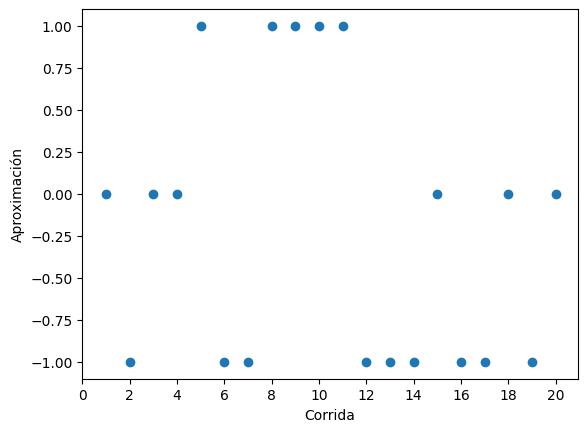

In [ ]:
plt.plot(np.arange(len(soluciones))+1, soluciones, 'o')
plt.xlabel('Corrida')
plt.ylabel('Aproximaci√≥n')
plt.xticks(np.arange(0, len(soluciones)+1, 2))
plt.show()

In [ ]:
np.unique(np.array(soluciones).round(2))

array([-1.,  0.,  1.])

Veamos c√≥mo depende la soluci√≥n obtenida de la condici√≥n inicial elegida

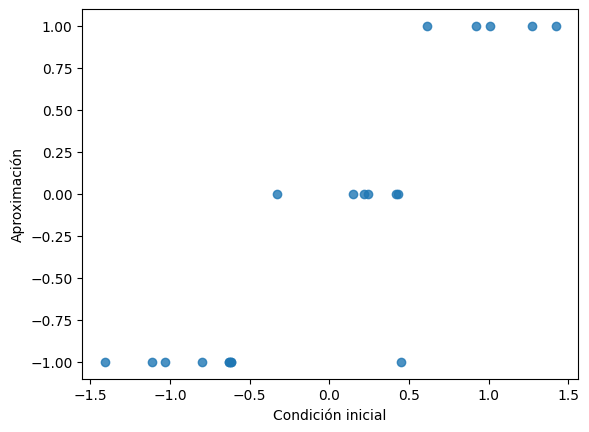

In [ ]:
plt.plot(condiciones_iniciales, soluciones, 'o', alpha=0.8)
plt.xlabel('Condici√≥n inicial')
plt.ylabel('Aproximaci√≥n')
plt.show()

Se puede observar que en muchos casos hay regiones de condiciones iniciales que me llevan a converger a una cierta ra√≠z. Sin embargo, en algunos casos puede pasar que la derivada de la funci√≥n haga que para una cierta condici√≥n inicial en una cierta regi√≥n me pase a otra regi√≥n y termine convergiendo en otra ra√≠z.

#### Ejercicio 3

Resuelva el problema de b√∫squeda de la ra√≠z para la funci√≥n `campovectorlineal` ($f(x)=2x-4$) definida al principio del Colab, usando el m√©todo de Newton-Raphson para la condici√≥n inicial $x_0=1$. Tenga en cuenta que hay que definir la funci√≥n `campovectorlinealprima` ($f'(x)=2$).


In [ ]:
def campovectorlinealprima(x: float) -> float:
    return 2.0

1. Cu√°ntas iteraciones necesit√©?


In [ ]:
newton(campovectorlineal, campovectorlinealprima, 1, 0.000001, 100)

Se encontr√≥ soluci√≥n luego de  1  iteraciones


2.0

2. Qu√© pasar√≠a con otra condici√≥n inicial?

In [ ]:
newton(campovectorlineal, campovectorlinealprima, 4, 0.000001, 100)

Se encontr√≥ soluci√≥n luego de  1  iteraciones


2.0

Cu√°ntas iteraciones del m√©todo de bisecci√≥n necesitar√≠a para llegar a la misma soluci√≥n usando como condici√≥n inicial el intervalo [1, 4]?

In [ ]:
N = np.arange(1, 20)
aprox = []
for n in N:
    aprox.append(biseccion(campovectorlineal, 1, 4, n))

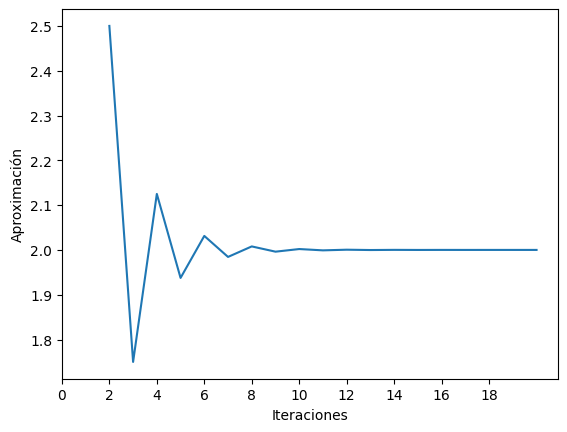

In [ ]:
plt.plot(N+1, aprox)
plt.xlabel('Iteraciones')
plt.ylabel('Aproximaci√≥n')
plt.xticks(np.arange(0, len(N)+1, 2))
plt.show()

M√°s all√° de este caso particular, en el que la funci√≥n es lineal y por ende el m√©todo de Newton-Raphson converge de manera trivial a la soluci√≥n en 1 iteraci√≥n (la recta tangente en todo punto de la recta es la misma recta), en general este m√©todo es mucho m√°s r√°pido (cuando converge) que el m√©todo de bisecci√≥n.

## M√©todo de la secante

El [m√©todo de la secante](https://en.wikipedia.org/wiki/Secant_method) es muy similar al m√©todo de bisecci√≥n, excepto que en lugar de dividir cada intervalo eligiendo el punto medio, el m√©todo de la secante divide cada intervalo por la l√≠nea secante que conecta los puntos finales. El m√©todo de la secante siempre converge a una ra√≠z de $f(x)=0$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b)<0$.

Sea $f(x)$ una funci√≥n continua en un intervalo cerrado $[a,b]$ tal que $f(a)f(b) < 0$. Una soluci√≥n de la ecuaci√≥n $f(x) = 0$ para $x \in [a,b]$ est√° garantizada por el [Teorema del valor intermedio](https://en.wikipedia.org/wiki/Intermediate_value_theorem). Considere la l√≠nea que conecta los valores de los puntos finales $(a,f(a))$ y $(b,f(b))$. La l√≠nea que une estos dos puntos se llama l√≠nea secante y se expresa mediante la f√≥rmula

$$
y = \frac{f(b) - f(a)}{b - a}(x - a) + f(a)
$$

El punto donde la l√≠nea secante cruza el eje $x$ es

$$
0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a)
$$

que calculamos para $x$

$$
x = a - f(a)\frac{b - a}{f(b) - f(a)}
$$

El procedimiento del m√©todo de la secante es casi id√©ntico al del m√©todo de bisecci√≥n. La √∫nica diferencia es c√≥mo dividimos cada subintervalo.
1. Elija un intervalo inicial $[a_0,b_0]$ tal que $f(a_0)f(b_0) < 0$.
2. Calcule $f(x_0)$ donde $x_0$ est√° dado por la recta secante.
$$
x_0 = a_0 - f(a_0)\frac{b_0 - a_0}{f(b_0) - f(a_0)}
$$
3. Determine el siguiente subintervalo $[a_1,b_1]$:
1. Si $f(a_0)f(x_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=a_0$ y $b_1=x_0$.
2. Si $f(b_0)f(x_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=x_0$ y $b_1=b_0$.
4. Repita (2) y (3) hasta que el intervalo $[a_N,b_N]$ alcance una longitud predeterminada.
5. Devuelva el valor $x_N$, la intersecci√≥n con el eje x del $N$√©simo subintervalo.

El [Teorema del valor intermedio](https://en.wikipedia.org/wiki/Intermediate_value_theorem) garantiza una soluci√≥n de la ecuaci√≥n $f(x)=0$ en el intervalo $[a,b]$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b) < 0$. Es decir, la funci√≥n cambia de signo en el intervalo y, por lo tanto, debe ser igual a 0 en alg√∫n punto del intervalo $[a,b]$.

![raices_secante](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_secante.png)

Escribamos una funci√≥n llamada `secante` que tome 4 par√°metros de entrada `f`, `a`, `b` y `N` y devuelva la aproximaci√≥n de una soluci√≥n de $f(x)=0$ dada por $N$ iteraciones del m√©todo de la secante. Si $f(a_n)f(b_n) \geq 0$ en cualquier punto de la iteraci√≥n (causado ya sea por un intervalo inicial incorrecto o un error de redondeo en los c√°lculos), entonces imprima `"El m√©todo de la secante falla"` y devuelva `Ninguno`.

In [ ]:
def secante(f, a, b, N):
    if f(a)*f(b) >= 0:
        print("El m√©todo de la secante falla")
        return None
    an, bn = a, b
    for n in range(N):
        x0 = an - f(an)*(bn - an)/(f(bn) - f(an))
        f_x0 = f(x0)
        if f(an)*f_x0 < 0:
            bn = x0
        elif f(bn)*f_x0 < 0:
            an = x0
        elif f_x0 == 0:
            print("Se encontr√≥ la soluci√≥n exacta")
            return x0
        else:
            print("El m√©todo de la secante falla")
            return None
    return an - f(an)*(bn - an)/(f(bn) - f(an))

Evaluemos el m√©todo en el problema del **Ejercicio 2**. Para ello usamos la funci√≥n `campovector` previamente definida ($f(x)=x-x^{3}$).

In [ ]:
secante(campovector, -1.7, -0.5, 100)

Se encontr√≥ la soluci√≥n exacta


-1.0

## Uso de scipy

Tambi√©n podemos usar el paquete scipy que tiene funciones para encontrar la ra√≠z usando el m√©todo de bisecci√≥n con `scipy.optimize.bisect`, el m√©todo de Newton-Raphson con `scipy.optimize.newton` cuando se le da como variable de entrada la derivada en `fprime`, el m√©todo de la secante con `scipy.optimize.newton` cuando en la variable de entrada `fprime` ponemos `None`, entre otros.

In [ ]:
import scipy.optimize as optimize

In [ ]:
# # # Bisecci√≥n
optimize.bisect(campovector, a=-1.7, b=-0.5)

-1.000000000000364

In [ ]:
# # # Newton-Raphson
optimize.newton(campovector, fprime=campovectorprima, x0=0.5)

np.float64(-1.0)

In [ ]:
# # # Secante
optimize.newton(campovector, fprime=None, x0=0.5)

np.float64(-1.0)

## Comparaci√≥n de m√©todos

Cuando converge, el m√©todo de Newton-Raphson suele hacerlo muy r√°pidamente y esta es su principal ventaja. Sin embargo, no se garantiza la convergencia del m√©todo y esto es obviamente una gran desventaja, especialmente en comparaci√≥n con los m√©todos de bisecci√≥n y de la secante, para los cuales s√≠ se garantiza la convergencia a una soluci√≥n (siempre que comiencen con un intervalo que contenga una ra√≠z).

El m√©todo de Newton-Raphson tambi√©n requiere calcular valores de la derivada de la funci√≥n en cuesti√≥n. Esto es potencialmente una desventaja si la derivada es dif√≠cil de calcular. En contraste, los m√©todos de bisecci√≥n y de la secante no requieren del c√°lculo de la derivada.

Los criterios de corte del m√©todo de Newton-Raphson suelen diferir de los de los m√©todos de bisecci√≥n y de la secante. En esos m√©todos, sabemos lo cerca que estamos de una soluci√≥n porque estamos calculando intervalos que contienen una soluci√≥n. En el m√©todo de Newton-Raphson, no sabemos cu√°n cerca estamos de una soluci√≥n. Todo lo que podemos calcular es el valor $f(x)$ y, por lo tanto, implementamos un criterio de corte basado en $f(x)$. Adem√°s, no hay garant√≠a de que el m√©todo de Newthon-Raphson converja a una soluci√≥n y debemos establecer un n√∫mero m√°ximo de iteraciones para que nuestra implementaci√≥n finalice si no encontramos una soluci√≥n.

**Ejemplo divergente de Newton-Raphson**

El m√©todo de Newton-Raphson puede diverger en ciertos casos. Por ejemplo, si la l√≠nea tangente en la ra√≠z es vertical como en $f(x)=x^{1/3}$. Tenga en cuenta que los m√©todos de bisecci√≥n y secante converger√≠an en este caso.

In [ ]:
# # # Ac√° incorporamos otra forma de definir funciones (handle of function)
f = lambda x: x**(1/3)
Df = lambda x: (1/3)*x**(-2/3)
approx = newton(f, Df, 0.1, 1e-2, 100)

Se excedi√≥ el n√∫mero de iteraciones m√°ximo


### Ejercicio 4

Vamos a comparar ahora el tiempo de convergencia de los m√©todos de bisecci√≥n, de Newton-Raphson, y de la secante. Para eso hagan varias corridas de cada m√©todo en la resoluci√≥n de la busqueda de la ra√≠z de la funci√≥n $f(x)=xe^x-1$ en el dominio entre -1 y 1, con inicializaci√≥n aleatoria, y calculen el tiempo que tarda cada m√©todo en cada corrida. Para cada m√©todo guarden esos tiempos en una variable, y despu√©s comparen entre m√©todos.

Para el c√°lculo de los tiempos usen el paquete `time`. Una forma de calcular el tiempo de un proceso es la siguiente:

    start = time.time()
    ... ac√° el proceso
    elapsed = (time.time() - start)


In [ ]:
import time

In [ ]:
f = lambda x: x*np.exp(x) - 1
df = lambda x: (1 + x)*np.exp(x)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:218: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:175: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:210: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


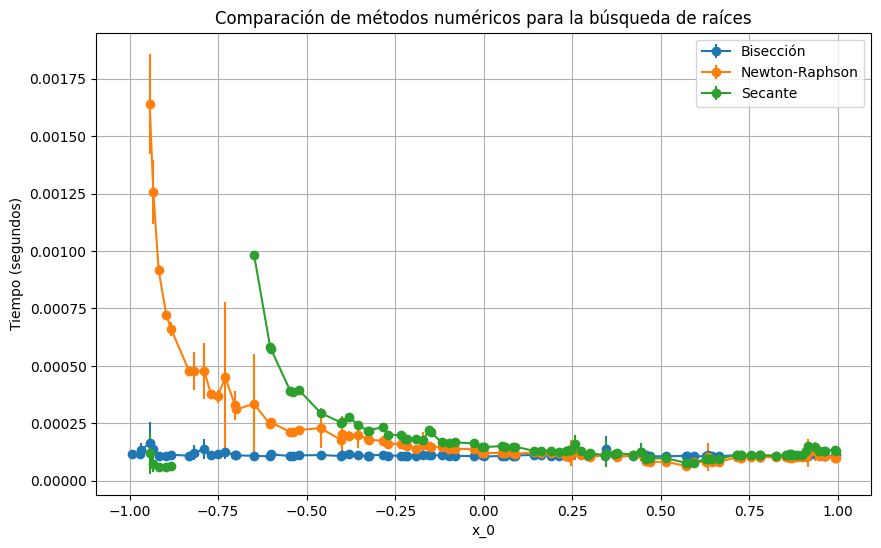

In [ ]:
def comparacion_de_metodos(f, df, a, b, N):
    rng = np.random.default_rng(0)
    x0s = rng.uniform(a, b, N)
    x0s_sorted = np.sort(x0s)

    bisect_times, bisect_errors = [], []
    newton_times, newton_errors = [], []
    secant_times, secant_errors = [], []

    max_iter = 100
    n_reps = 10

    for x0 in x0s_sorted:

        x0_bisect_times, x0_newton_times, x0_secant_times = [], [], []
        for _ in range(n_reps):
            try:
                start = time.time()
                optimize.bisect(f, a, b, maxiter=max_iter)
                elapsed = time.time() - start
                x0_bisect_times.append(elapsed)

                start = time.time()
                optimize.newton(f, x0, fprime=df, maxiter=max_iter)
                elapsed = time.time() - start
                x0_newton_times.append(elapsed)

                start = time.time()
                optimize.newton(f, x0, maxiter=max_iter)
                elapsed = time.time() - start
                x0_secant_times.append(elapsed)
            except:
                pass

        bisect_times.append(np.mean(x0_bisect_times)), bisect_errors.append(np.std(x0_bisect_times, ddof=1))
        newton_times.append(np.mean(x0_newton_times)), newton_errors.append(np.std(x0_newton_times, ddof=1))
        secant_times.append(np.mean(x0_secant_times)), secant_errors.append(np.std(x0_secant_times, ddof=1))

    plt.figure(figsize=(10, 6))
    plt.errorbar(x0s_sorted, bisect_times, yerr=bisect_errors, fmt="o-", label="Bisecci√≥n")
    plt.errorbar(x0s_sorted, newton_times, yerr=newton_errors, fmt="o-", label="Newton-Raphson")
    plt.errorbar(x0s_sorted, secant_times, yerr=bisect_errors, fmt="o-", label="Secante")
    plt.xlabel(r'x_0')
    plt.ylabel('Tiempo (segundos)')
    plt.title('Comparaci√≥n de m√©todos num√©ricos para la b√∫squeda de ra√≠ces')
    plt.legend()
    plt.grid(True)
    plt.show()

comparacion_de_metodos(f, df, -1, 1, 100)

**Convergencia**

Podemos ver el orden de convergencia de los distintos m√©todos. Para destacar, el m√©todo de bisecci√≥n se dice que tiene convergencia lineal, Newton-Raphson tiene convergencia cuadr√°tica (por lo que es m√°s r√°pido), y el m√©todo de la secante tiene convergencia superlineal (est√° entre los dos m√©todos anteriores).

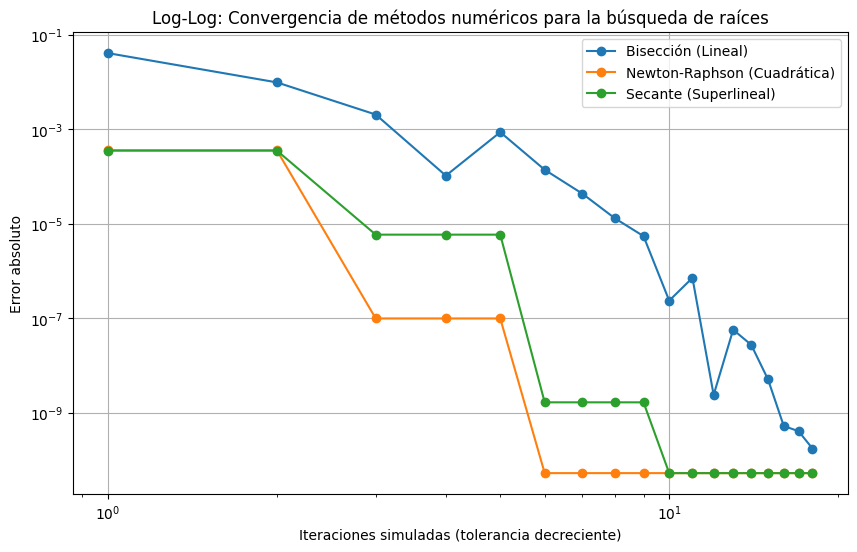

In [ ]:
# Definir una funci√≥n ejemplo: f(x) = x^3 - x - 2
def f(x):
    return x**3 - x - 2

# Derivada de la funci√≥n (para Newton-Raphson)
def df(x):
    return 3*x**2 - 1

# Par√°metros iniciales
a, b = 1, 2
x0 = 1.5
x1 = 1.6
tol = 1e-10
maxiter = 100

# Almacenar los errores en cada iteraci√≥n
errors_bisect = []
errors_newton = []
errors_secant = []

# Valor de la ra√≠z verdadera utilizando alta precisi√≥n (para referencia)
root_true = optimize.bisect(f, a, b, xtol=tol)

# Simular iteraciones con diferentes tolerancias
for i in np.arange(1, 10, 0.5):
    tol_iter = float(10)**(-i)
    root_bisect = optimize.bisect(f, a, b, xtol=tol_iter, maxiter=maxiter)
    root_newton = optimize.newton(f, x0, fprime=df, tol=tol_iter, maxiter=maxiter)
    root_secant = optimize.newton(f, x0, tol=tol_iter, maxiter=maxiter)

    # Calcular y almacenar los errores
    errors_bisect.append(abs(root_bisect - root_true))
    errors_newton.append(abs(root_newton - root_true))
    errors_secant.append(abs(root_secant - root_true))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors_bisect) + 1), errors_bisect, label="Bisecci√≥n (Lineal)", marker='o')
plt.plot(range(1, len(errors_newton) + 1), errors_newton, label="Newton-Raphson (Cuadr√°tica)", marker='o')
plt.plot(range(1, len(errors_secant) + 1), errors_secant, label="Secante (Superlineal)", marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iteraciones simuladas (tolerancia decreciente)')
plt.ylabel('Error absoluto')
plt.title('Log-Log: Convergencia de m√©todos num√©ricos para la b√∫squeda de ra√≠ces')
plt.legend()
plt.grid(True)
plt.show()

# B√∫squeda de puntos fijos

Ahora, podemos aplicar estos m√©todos num√©ricos para el c√°lculo de puntos fijos en distintos sistemas din√°micos 1D, ya que son las ra√≠ces de los campos vectores.

## Ejercicio 5

Hagamos el an√°lisis gr√°fico del flujo del sistema 1D definido por la ecuaci√≥n:

$$\dot{x} = e^{x} ‚àí \cos{(ùë•)}$$

Para eso, definamos las funciones para el campo vector y su derivada

In [ ]:
campovector_1e = lambda x: np.exp(x) - np.cos(x)
campovectorprima_1e = lambda x: np.exp(x) + np.sin(x)

1. Elijan un dominio (tengan en cuenta que el t√©rmino exponencial se hace muy grande para valores positivos no tan grandes)

In [ ]:
a, b = -3*np.pi, np.pi/2

2. Grafiquen la exponencial y el menos coseno, y vean las intersecciones


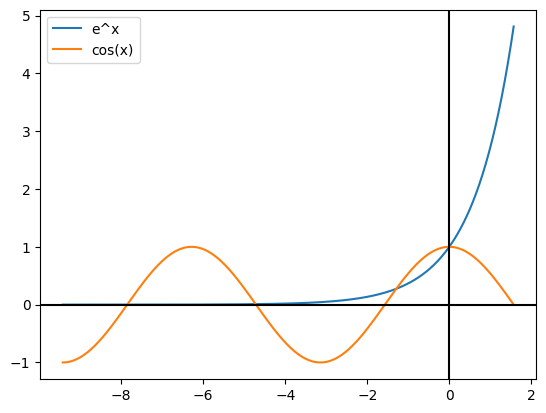

In [ ]:
x = np.linspace(a, b, 1000)
plt.plot(x, np.exp(x), label='e^x')
plt.plot(x, np.cos(x), label='cos(x)')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.legend()
plt.show()

3. Hagan el gr√°fico del campo vector


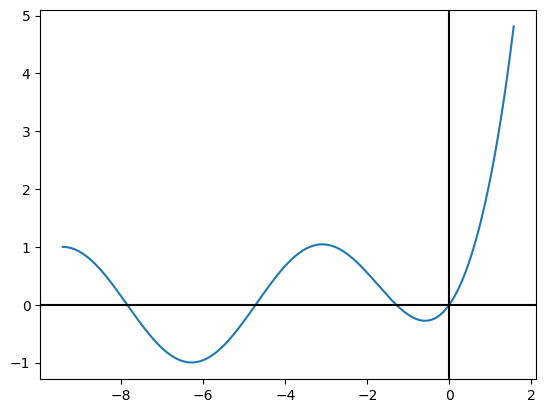

In [ ]:
x = np.linspace(a, b, 1000)
plt.plot(x, campovector_1e(x))
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

4. Busquen los puntos fijos usando distintos m√©todos y condiciones iniciales. a) Elegir 100 condiciones iniciales aleatorias y calcular las soluciones. b) Graficar las soluciones en funci√≥n de la condici√≥n inicial. Qu√© comportamiento se observa? c) C√≥mo son las soluciones aproximadas a partir de redondear los resultados previos a 2 d√≠gitos?

Se encontr√≥ soluci√≥n luego de  74  iteraciones
Se encontr√≥ soluci√≥n luego de  17  iteraciones
Se encontr√≥ soluci√≥n luego de  38  iteraciones
Se encontr√≥ soluci√≥n luego de  31  iteraciones
Se encontr√≥ soluci√≥n luego de  81  iteraciones
Se encontr√≥ soluci√≥n luego de  29  iteraciones
Se excedi√≥ el n√∫mero de iteraciones m√°ximo
Se encontr√≥ soluci√≥n luego de  19  iteraciones
Se encontr√≥ soluci√≥n luego de  16  iteraciones
Se excedi√≥ el n√∫mero de iteraciones m√°ximo
Se encontr√≥ soluci√≥n luego de  12  iteraciones
Se encontr√≥ soluci√≥n luego de  14  iteraciones
Se excedi√≥ el n√∫mero de iteraciones m√°ximo
Se excedi√≥ el n√∫mero de iteraciones m√°ximo
Se encontr√≥ soluci√≥n luego de  66  iteraciones
Se encontr√≥ soluci√≥n luego de  22  iteraciones
Se excedi√≥ el n√∫mero de iteraciones m√°ximo
Se encontr√≥ soluci√≥n luego de  53  iteraciones
Se encontr√≥ soluci√≥n luego de  30  iteraciones
Se encontr√≥ soluci√≥n luego de  28  iteraciones
Se encontr√≥ soluci√≥n luego de  80

/tmp/ipython-input-3319059186.py:1: RuntimeWarning: overflow encountered in exp
  f = lambda x: x*np.exp(x) - 1
/tmp/ipython-input-2344096720.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x) + np.sin(x)
/tmp/ipython-input-4177273955.py:12: RuntimeWarning: invalid value encountered in scalar divide
  xn = xn - f_xn/Df_xn


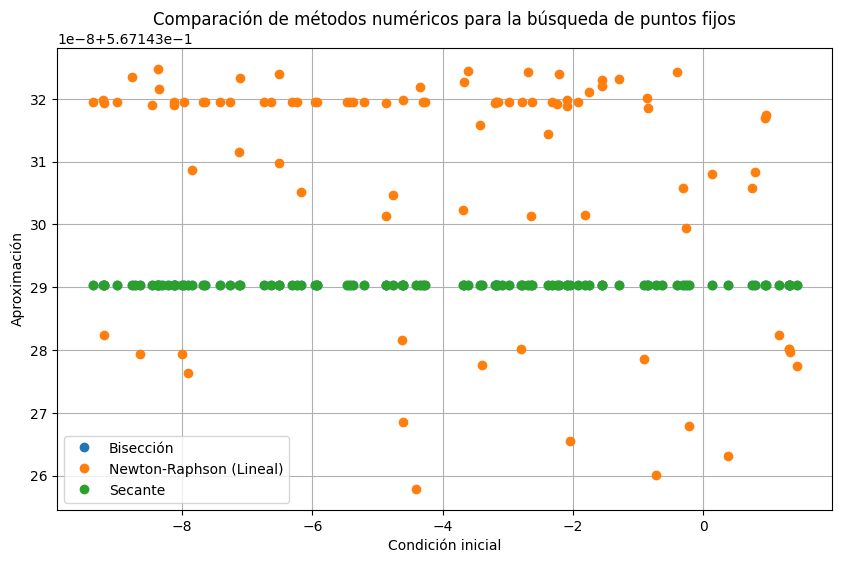

In [ ]:
rng = np.random.default_rng(0)
x0s = rng.uniform(a, b, 100)
x0s_sorted = np.sort(x0s)

max_iter = 100

bisecciones = [biseccion(f, a, b, N=max_iter) for x0 in x0s_sorted]
newton_lineal = [newton(f, fprima, x0, 1e-7, max_iter=max_iter) for x0 in x0s_sorted]
secantes = [secante(f, a, b, N=max_iter) for x0 in x0s_sorted]

plt.figure(figsize=(10, 6))
plt.plot(x0s_sorted, bisecciones, "o", label="Bisecci√≥n")
plt.plot(x0s_sorted, newton_lineal, "o", label="Newton-Raphson (Lineal)")
plt.plot(x0s_sorted, secantes, "o", label="Secante")
plt.xlabel('Condici√≥n inicial')
plt.ylabel('Aproximaci√≥n')
plt.title('Comparaci√≥n de m√©todos num√©ricos para la b√∫squeda de puntos fijos')
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 6

Podemos plantear un m√©todo automatizado para el c√°lculo de ra√≠ces que aplique lo visto en esta clase. Para ello, vamos a definir una funci√≥n de Python llamada `root_finder` que calcule las ra√≠ces de una funci√≥n `f` en un conjunto de valores de `x` haciendo una exploraci√≥n para N inicializaciones y usando alguna de las opciones dentro de scipy, y reporte las soluciones. Consideren incorporar distintas variables de entrada seg√∫n les parezca adecuado. Por ejemplo, pueden poner un argumento `seed` que me defina una semilla de numpy para elegir las inicializaciones aleatorias.

Tengan en cuenta que muchas de las soluciones pueden repetirse. Entonces, dentro de la funci√≥n, vamos a quedarnos con los valores √∫nicos usando `np.unique`. Cabe destacar que para que esta funci√≥n las considere la misma soluci√≥n deben ser el mismo n√∫mero de m√°quina. Qu√© se les ocurre que se podr√≠a hacer si se trata de la misma soluci√≥n pero que difiere en algunos decimales poco significativos?

Finalmente, prueben la funci√≥n que definieron en la aplicaci√≥n a la b√∫squeda de los puntos fijos del sistema definido por $\dot{r} = r(r-1)$.

In [ ]:
from typing import Callable

def root_finder(
    f: Callable,
    a: float, b: float,
    df: Callable | None = None,
    method: str = "bisect",
    tol: float = 1e-6, max_iter: int = 100,
    N: int = 100, seed: int = 0,
    round_digit: int = 6
) -> list[float]:

    import scipy.optimize as optimize
    import itertools

    rng = np.random.default_rng(seed)
    x0s = rng.uniform(a, b, N)
    x0s_sorted = np.sort(x0s)

    match method:
        case "bisect":
            all_intervals = itertools.product(x0s_sorted, x0s_sorted)
            roots = [optimize.bisect(f, a0, b0, xtol=tol, maxiter=max_iter)
                     for a0, b0 in all_intervals if a0 < b0 and f(a0)*f(b0) < 0]
        case "newton":
            roots = [optimize.newton(f, x0, fprime=df, tol=tol, maxiter=max_iter)
                     for x0 in x0s_sorted]
        case "secant":
            roots = [optimize.newton(f, x0, tol=tol, maxiter=max_iter)
                     for x0 in x0s_sorted]

    return np.sort(np.unique(np.array(roots).round(round_digit))).tolist()

In [ ]:
rdot = lambda r: r * (r - 1) * (r + 1)
rdot_prima = lambda r: 3*(r**2) - 1
root_finder(f=rdot, df=rdot_prima,
            a=-2, b=2,
            tol=1e-6, max_iter=30,
            N=10,
            seed=0,
            round_digit=5,
            method="newton")

[0.0, 1.0]